# SQL Soda Notebook

## Introduction

This notebook is an introduction to SQL. We will be working with a SQLite dataset: The WSDR Database. From the WSDR Database, we will be working with the soda table that includes 8 columns and 1048575 rows. The soda table will allow us to create queries to produce Pandas dataframes. 

In [1]:
import sqlalchemy
import sqlite3
import pandas as pd
import numpy as np

In [2]:
%load_ext sql

In [3]:
# create a SQL Alchemy connection to the database

%sql sqlite:///wsdr.db
conn = sqlite3.connect("wsdr.db")
engine = sqlalchemy.create_engine("sqlite:///wsdr.db")

## The WSDR Database

Let's load in the database by using cell magic so that we can explore the database. 

In [4]:
%%sql
SELECT * FROM sqlite_master WHERE type='table';

 * sqlite:///wsdr.db
Done.


type,name,tbl_name,rootpage,sql
table,soda,soda,9801,"CREATE TABLE soda (STORE, UPC REFERENCES upc (UPC), WEEK, MOVE, PRICE, SALE, PROFIT, OK)"
table,upc,upc,9159,"CREATE TABLE upc (COM_CODE, UPC REFERENCES cereal (UPC), DESCRIP, SIZE, ""CASE"", NITEM)"


From running the above cell, we see the database has 2 tables: soda, upc.

### Part 1: Exploring the Data

We want to read the data from SQL using a SQL query. When writing a SQLite database, only SQL queries are accepted.

Using SQL Alchemy - we can write SQL commands to pass into Python functions - that can yield us Pandas Dataframes

SQL queries will be written within """ in the beginning and end of the code. After the query is written, we will use pd.read_sql(query, engine) to return a Pandas dataframe of the outputted data. An outline of a written query with the corresponding pandas function is shown below.

`query = """SELECT ..."""`

`output = pd.read_sql(query, engine)`

`output`

#### What does the soda table look like? Let's create a query below to select all the values from the soda table.

In [8]:
example1 = """
SELECT * FROM soda;
"""

result1 = pd.read_sql(example1, engine)
result1

,STORE,UPC,WEEK,MOVE,PRICE,SALE,PROFIT,OK
0,2,179,1,1,10,,99.9,1
1,2,179,2,0,0,,0,1
2,2,179,3,0,0,,0,1
3,2,179,4,2,10,,99.9,1
4,2,179,5,0,0,,0,1
...,...,...,...,...,...,...,...,...
1048570,112,1200000878,137,0,0,,0,1
1048571,112,1200000878,138,0,0,,0,1
1048572,112,1200000878,139,0,0,,0,1
1048573,112,1200000878,140,0,0,,0,1


#### How many unique stores are there? Write a query to display the result.

In [9]:
example2 = """
SELECT count(DISTINCT store) 
        AS total_store
FROM soda;
"""

result2 = pd.read_sql(example2, engine)
result2

,total_store
0,86


### Part 2: Sample Query 

#### Exercise 1: How many distinct UPCs (universal product codes) are there? Write a query to display the result.

In [11]:
# answer

exercise1 = """
SELECT DISTINCT upc
        AS distinct_upc
FROM soda
ORDER BY distinct_upc;
"""

res1 = pd.read_sql(exercise1, engine)
res1

,distinct_upc
0,1060810005
1,1060810010
2,1060820016
3,1060830015
4,1060870001
...,...
136,461
137,462
138,463
139,464


#### Exercise 2a: Display the stores and their total sales from highest to lowest. Write a query to display the result. (MOVE is the # units sold)

In [13]:
# make an sql query to pass in to the python command to yield pandas df

exercise2 = """
SELECT * FROM (SELECT store, SUM(MOVE) 
FROM soda 
GROUP BY store 
ORDER BY SUM(MOVE) DESC);
"""

res2 = pd.read_sql(exercise2, engine)
res2

,store,SUM(MOVE)
0,102,731351
1,98,622856
2,73,556304
3,132,553740
4,122,548409
...,...,...
81,118,188656
82,62,174278
83,133,167099
84,139,154064


#### Exercise 2c: Create a plot with the store number and their total profits.

Becuase this already in a Pandas DF we can call pandas plotting commands

<AxesSubplot:xlabel='store', ylabel='SUM(MOVE)'>

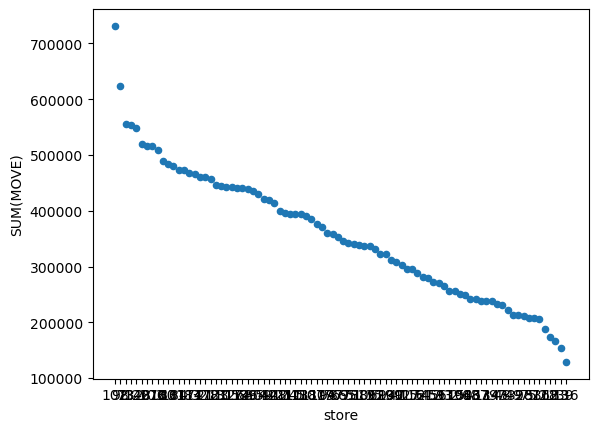

In [14]:


res2.plot.scatter(x = 'store', y = 'SUM(MOVE)')

#### Exercise 2d: What are some observations that you notice from the graph?

*insert answer here*

Possible answer: The highest number of units sold is over 700,000 while the lowest number of units sold is around 100,000.

#### Exercise 3: Display a dataframe that shows the singular store and the number of units it sold. Write a query to display the result.

In [15]:
# answer

exercise3 = """
SELECT * FROM (SELECT store, SUM(MOVE) 
FROM soda 
GROUP BY store 
ORDER BY SUM(MOVE) DESC) LIMIT 1;
"""

res3 = pd.read_sql(exercise3, engine)
res3

,store,SUM(MOVE)
0,102,731351
